# Проект по прогнозированию оттока клиентов фитнес-клуба

**цель** - подготовить план действий по удержанию клиентов фитнес-клуба.

**задачи:**
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- разработать рекомендации по повышению качества работы с клиентами:
    - выделить целевые группы клиентов;
    - предложить меры по снижению оттока;
    - определить другие особенности взаимодействия с клиентами.

**Данные** - электронные анкеты клиентов фитнес-клуба 4000 шт

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

## исследовательский анализ данных

In [2]:
df=pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')
display(df.head())
display(df.info())
display(df.describe())
print(f'дубликатов: {df.duplicated().sum()}')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


дубликатов: 0


- 3/4 клиентов не старше 31 года, при этом больше половины находятся в возрастном диапазоне от 25 до 30.
- 35,8% клиентов ходят в зал потому что он рядом с домом, и 48,7% - рядом с работой, что повышает их лояльность.
- 30.8% пришли по акции "приведи друга"
- половина клиентов покупают месячный абонемент
- большая часть клиентов ходит в зал менее полугода, но есть редкие "долгожители", которые посещают его 2,5 года.
- в среднем клиенты посещают зал 1-2 раза в неделю.
- те кто ходят в зал 2 раза и чаще, обычно не уменьшают число посешений в неделю, в отличие от тех, кто ходит 1 раз в неделю.
- 41% посщает групповые занятия
- средний отток 26,5% в месяц.

посмотрим на данные в разрезе оттекших и оставшихся клиентов

In [3]:
df.columns=df.columns.str.lower()
churn_yes=df[df['churn']==1]
churn_no=df[df['churn']==0]

print('----------------оттекшие клиенты-----------------')
display(churn_yes.describe())
print('----------------оставшиеся клиенты----------------')
display(churn_no.describe())

----------------оттекшие клиенты-----------------


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


----------------оставшиеся клиенты----------------


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


чаще оттекают клиенты:
- молодые (в среднем на 3 года младше оставшихся),
- реже участвующие в партнерской программе или программе "приведи друга"
- большинство из них (более 75% имеют абонемент на месяц)
- с среднем на 20% реже посещают групповые занятия
- лайфтайм 75% из них не превышает 1 месяц, но если клиент проходил в зал более 9 месяцев, то вероятность что он уйдет снижается,
- посещают зал в среднем 1,5 раза в неделю, в то время как оставшиеся клиенты в среднем 2 и более раза. и в последнем месяце оттекшие клиенты начинают посещать в среднем 1 раз в неделю.

посмотрим на распределения признаков для оттекших и оставшихся клиентов.

In [4]:
# функция считающая количество корзин
def my_bins(df,value):
    if df[value].max() > 2:
        return 20
    elif df[value].max() == 2:
        return 2
    elif df[value].max() > 20:
        return  50
    elif df[value].max() > 100:
        return  100
    else: return 10
    
def bar(column):
    fig, axes=plt.subplots(figsize=(14, 4), nrows=1, ncols=2)
    axes[0].hist(churn_yes[column], bins=my_bins(churn_yes, column))
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('частота')
    axes[0].set_title(f'Распределение {column} для оттекших клиентов')
    axes[1].hist(churn_no[column], bins=my_bins(churn_no, column))
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('частота')
    axes[1].set_title(f'Распределение {column} для оставшихся клиентов')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

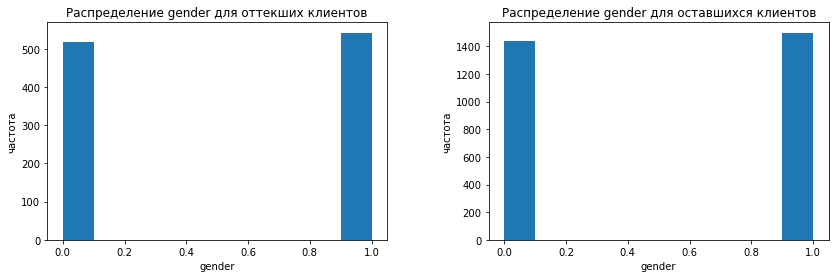

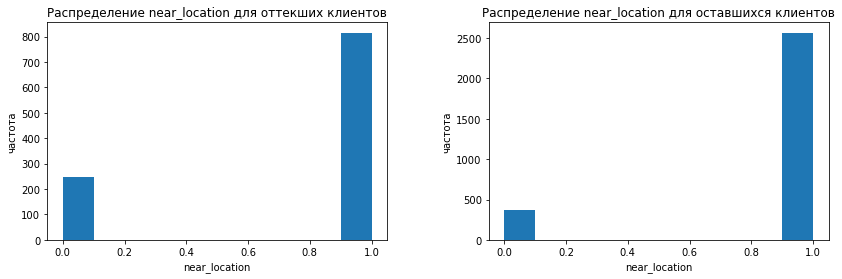

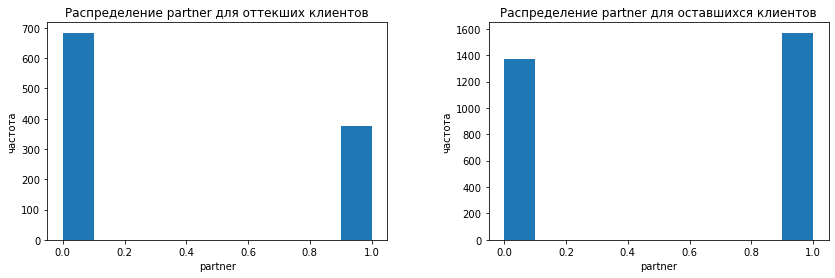

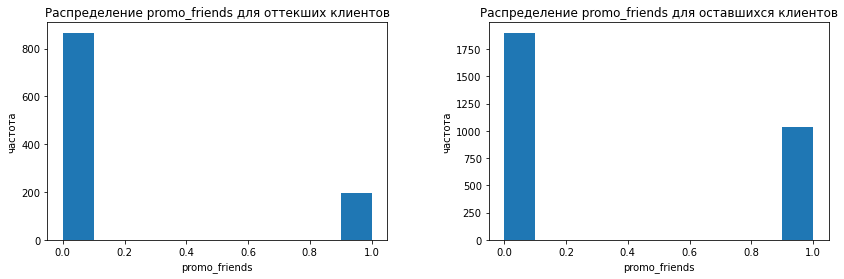

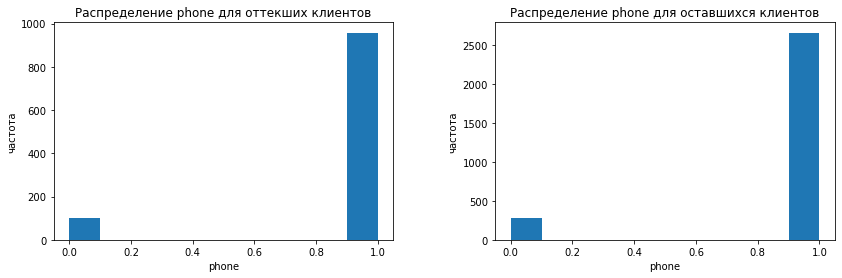

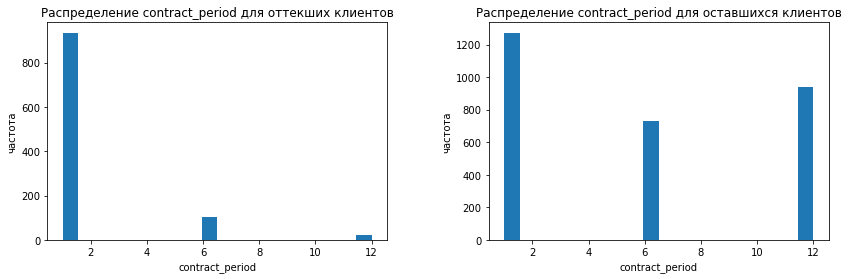

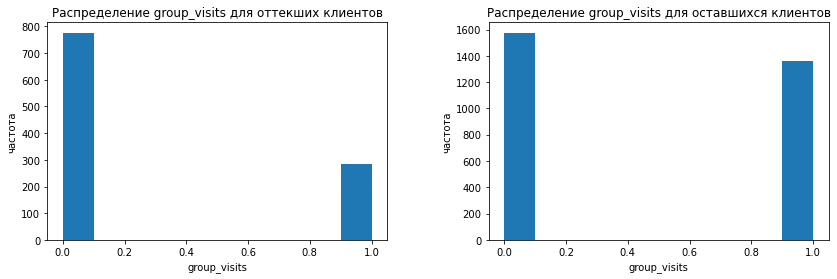

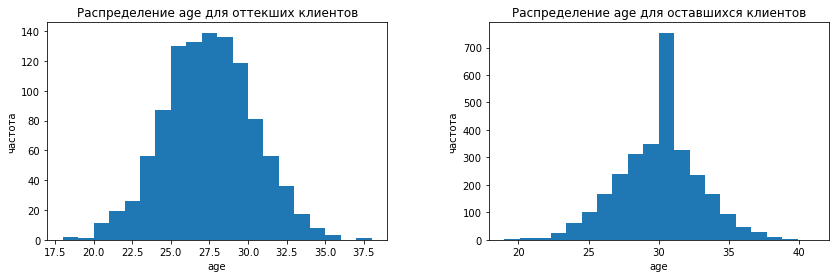

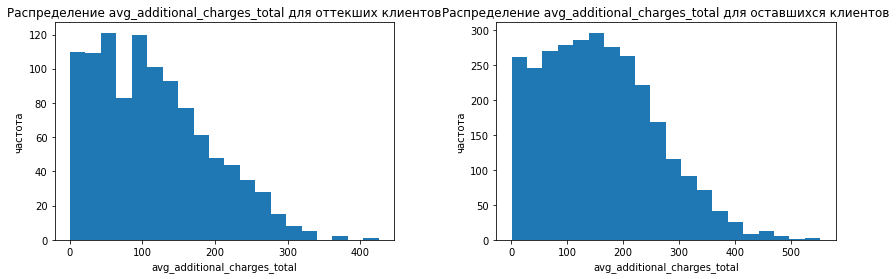

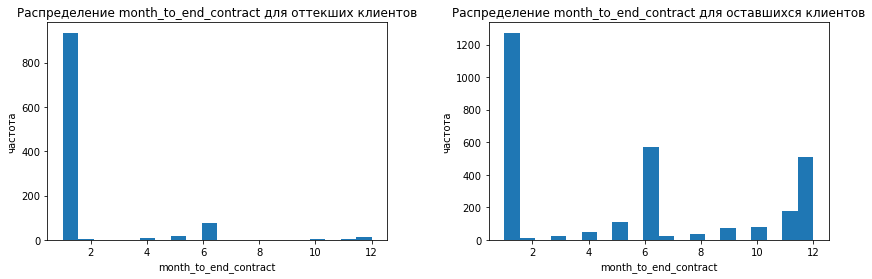

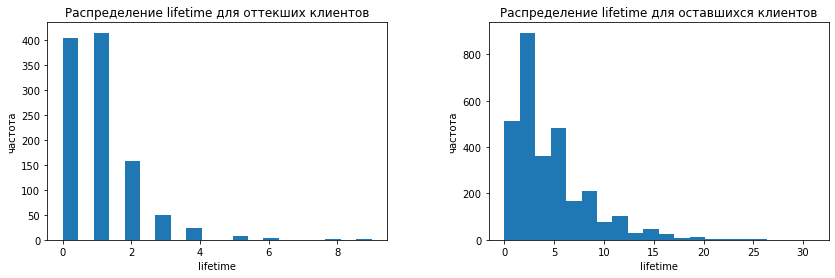

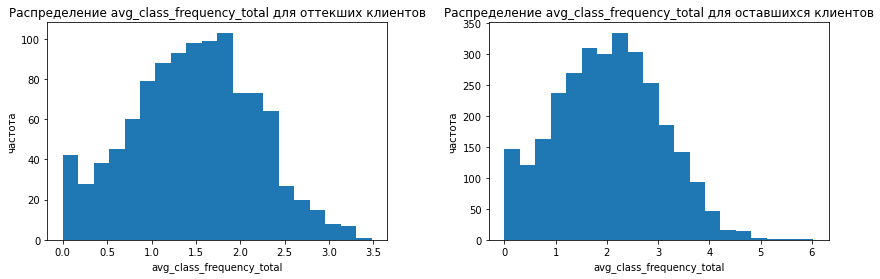

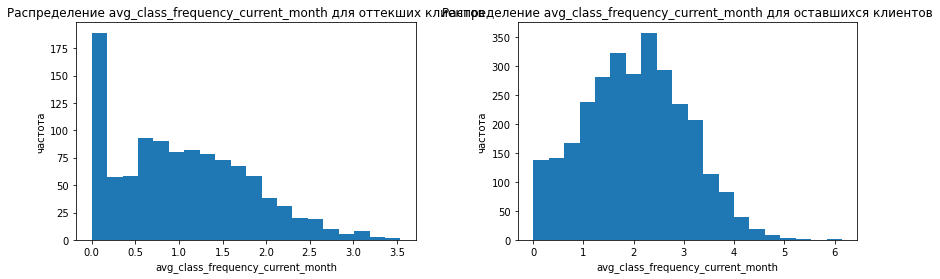

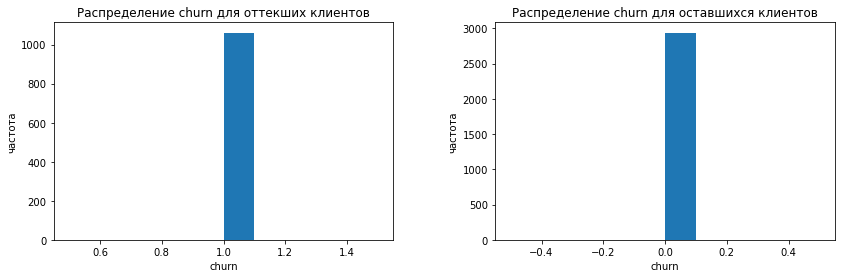

In [5]:
for column in churn_yes.columns:
    bar(column)

для большинства признаков распределения близки, только средняя частота посещений в неделю за предыдущий месяц отличаются, за счет большого числа 0 у оттекших клиентов.

составим матрицу корреляций

In [6]:
df.corr().style.background_gradient('Blues')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


есть сильно коррелирующие признаки: срок до окончания текущего действующего абонемента и длительность текущего действующего абонемента, средняя частота посещений в неделю за все время с начала действия абонемента и за предыдущий месяц. 
необходимо бует оставить только по 1 признаку для регрессионной модели

## построение модели прогнозирования оттока клиентов

построим модель бинарной классификации

In [7]:
#удалим по 1 из сильно коррелрующих признаков
X=df.drop(['churn', 'month_to_end_contract', 
           'avg_class_frequency_current_month'], axis=1)
y=df['churn']
#сандартизируем данные
scaler = StandardScaler() 
X_sc = scaler.fit_transform(df.drop(columns = ['churn']))

#разобьем на подвыборки
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=df['churn'])

#обучим модель логистической регрессией
model =LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# сделаем прогнозы
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1] 

In [8]:
# обучим модель случайного леса
rf_model =  RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

сделаем формулу выводящуюю метрики

In [9]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
print_all_metrics(y_test,
                  predictions, 
                  probabilities,
                  title = 'Метрики для модели логистической регрессии:')
print_all_metrics(y_test, 
                  rf_predictions,
                  rf_probabilities,
                  title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.90
	Recall: 0.85
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.88
	Recall: 0.83


логистическая регрессия показала себя немного лучше по всем метрикам, но Recall надо корректировать.

## кластеризация клиентов

стандартизируем данные и построим дендрограмму

In [ ]:
scaler = StandardScaler() 
X_sc = scaler.fit_transform(df.drop(columns = ['churn']))

#матрица расстояний
linked = linkage(X_sc, method = 'ward') 
#дендрограмма
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

на основании дендрограммы можно выделить 4 кластера. но "фиолетовый" кластер очень большой, можно предположить, что можно его поделить на 2

обучим модель кластеризации на основании алгоритма K-Mean для 5 кластеров

In [ ]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

# средние значения признаков по кластерам
df['cluster_km']=labels
df.groupby('cluster_km').mean().style.background_gradient("Blues")

выделяется кластер 4 с самыми старшими клиентами, чей лайфтайм в среднем выше, чем у остальных групп, они покупают абонементы на длительный периол, чаще остальных ходят в зал и намного реже оттекают (6,8%). они больше остальных тратят на доп услуги.

есть кластер 0, "работающих рядом". среди них больше всех клиентов пришедших по партнерской программе и программе "приведи друга", в среднем они покупают абонемент на продолжительный период (11 мес) и чаще остальных ходят на групповые звнятия. много тратят на доп услуги. по ним самый низкий отток (2,8%)

есть кластер 3 самых молодых клиентов, живущих рядом с залом, у них самый короткий средний лайфтайм, и они реже всех посещают групповые занятия. по ним наблюдается самый большой отток (51,4%)

также много уходят из кластера живущих далеко от зала (44,3%)

посмотрим распределения признаков по кластерам

In [ ]:
cols=['gender', 'near_location', 'partner', 'promo_friends', 'phone',  'group_visits', 'churn']
for column in cols:   
    plt.figure(figsize=(12, 5))
    sns.countplot(x=column, data=df, hue='cluster_km', palette='coolwarm')
    plt.legend()
    plt.title(f'Распределение {column}  по кластерам')
    plt.xlabel(column)
    plt.ylabel('частота')
    plt.show()

In [ ]:
col_box=['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 
         'avg_class_frequency_total', 'avg_class_frequency_current_month']
for column in col_box:   
    plt.figure(figsize=(12, 5))
    sns.violinplot(y=column, data=df, x='cluster_km', palette="coolwarm")
    plt.title(f'Распределение {column}  по кластерам')
    plt.xlabel(column)
    plt.ylabel('частота')
    plt.show()

- в основном годовые абонементы покупают клиенты пришедшие по программам.
- 3 кластер самый молодой и многочисленный, 0 и 4 немного скошены в сторону более взрослых.
- распределение дополнительных трат схоже для всех кластеров, и коррелирует с количеством клиенов в кластре.
- распределение жизненного цикла 3 кластера отличается от остальых, в нем очень много клиентов пришедших в текущем месяце.
- распределения по числу посещений в в неделю за все срем сильно отличаются. в 3 кластере никто стабильно не ходит чаще 2 раз в неделю, в основном 1 раз, при этом в этой группе много тех, кто вообще не ходит. в текущем месяце ситуация схожа, только резко увеличивается число не клиентов переставших ходить. чаще всего ходит 4 кластер, в нем все ходят 2 раза в неделю и чаще.
- программа "приведи друга" не очень эффективна, самые стабильные и прибыльные клиенты редко приходят по этой программе.

к оттоку склонен 3 кластер (самые молодые, посещающие зал не более 3 месяцев) - 51.4%, самые надежные 0 и 4 кластеры (пришедшие по партнерской программе и самый "взрослый" кластер) - 2.8% и 6.8% оттока соответственно.

## выводы и рекомендации

чаще всего оттекают клиенты:
- молодые (в среднем на 3 года младше оставшихся),
- реже участвующие в партнерской программе или программе "приведи друга"
- большинство из них (более 75% имеют абонемент на месяц)
- с среднем на 20% реже посещают групповые занятия
- лайфтайм 75% из них не превышает 1 месяц, но если клиент проходил в зал более 9 месяцев, то вероятность что он уйдет снижается,
- посещают зал в среднем 1,5 раза в неделю, в то время как оставшиеся клиенты в среднем 2 и более раза. и в последнем месяце оттекшие клиенты начинают посещать в среднем 1 раз в неделю.

стабильнее всех ходят клиенты пришедшие по программам и работающие рядом с залом, посещающие групповые занятия, а также люди старше 27. и они же больше всех тратят на доп услуги.

**Маркетинговые действия:**
- расширять партнерскую сеть на компании располагающиеся неподалеку от зала
- надо продвигать групповые занятия, особенно среди молодый клиентов, чтобы удерживать их. можно крутить промо-ролики занятий (типо трейлеров) на телевизорах в зале.
- продвигать абонементы 6-12 мес. сделать такую цену, чтобы при пересчете на месячный абонемент получалось немного дешевле чем покупать абонемент на месяц. или дарить небольшой сувенир с мерчем при покупке годового абонемента (держатель для волос, эспандер-рязинка и тд)
- целевая аудитория 27+, следует ориентировать рекламу на них.
- остановить программу "приведи друга", она не очень эффективна, самые стабильные и прибыльные клиенты редко приходят по этой программе.